<a href="https://colab.research.google.com/github/sahug/ds-bert/blob/main/BERT%20NLP%20-%20Session%203%20-%20Text%20Classification%20Using%20BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BERT NLP - Session 3 - Text Classification Using BERT**

In [7]:
!pip install -U tensorflow-text

     |████████████████████████████████| 4.9 MB 5.3 MB/s 
     |████████████████████████████████| 462 kB 41.8 MB/s 


In [8]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [9]:
import pandas as pd

In [25]:
df = pd.read_csv("/content/sample_data/spam.csv", encoding="ISO-8859-1")

In [26]:
df.head()

,Category,Message,A,B,C
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [30]:
#Drop unwanted columns
df = df.drop(["A",	"B",	"C"], axis=1)
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
#Review Dataset
df.groupby("Category").describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    653  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [32]:
df["Category"].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [33]:
#Since we have unballanced data. We will have to balance it.
df_spam = df[df['Category'] == "spam"]
df_spam.shape

(747, 2)

In [34]:
df_ham = df[df["Category"]=="ham"]
df_ham.shape

(4825, 2)

In [36]:
df_ham_downsample = df_ham.sample(df_spam.shape[0])
df_ham_downsample.shape

(747, 2)

In [37]:
df_balanced = pd.concat([df_spam, df_ham_downsample])
df_balanced.shape

(1494, 2)

In [39]:
df_balanced["Category"].value_counts()

spam    747
ham     747
Name: Category, dtype: int64

In [40]:
#Apply boolean encoding on spam and ham
df_balanced["spam"] = df_balanced["Category"].apply(lambda x: 1 if x=="spam" else 0)
df_balanced.sample(10)

,Category,Message,spam
3999,spam,This is the 2nd time we have tried to contact ...,1
4272,ham,Kind of. Just missed train cos of asthma attac...,0
4778,ham,O we cant see if we can join denis and mina? O...,0
462,spam,"UpgrdCentre Orange customer, you may now claim...",1
5344,ham,When you guys planning on coming over?,0
1082,ham,Send to someone else :-),0
4588,ham,Have you not finished work yet or something?,0
2178,ham,"I don,t think so. You don't need to be going o...",0
491,spam,Congrats! 1 year special cinema pass for 2 is ...,1
2943,spam,We currently have a message awaiting your coll...,1


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_text = train_test_split(df_balanced["Message"], df_balanced["spam"], stratify=df_balanced["spam"])

In [42]:
X_train.head(4)

2266    <Forwarded from 88877>FREE entry into our å£25...
2094    PRIVATE! Your 2004 Account Statement for 07742...
4027           Lol its ok I didn't remember til last nite
737     Hi. Customer Loyalty Offer:The NEW Nokia6650 M...
Name: Message, dtype: object

In [43]:
#Download pretrained process and encoder
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [44]:
from pandas.io.xml import preprocess_data
#Write a function to get the encoding out of pretrained model downloaded
def get_sentence_embeding(sentences):
  preprocess_text = bert_preprocess(sentences)
  return bert_encoder(preprocess_text)["pooled_output"]


In [45]:
get_sentence_embeding([
                       "500$ discount. hurry up!",
                       "Are you up for a volleyball game tomorrow?"
])

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.79954535, -0.418408  , -0.80555713, ..., -0.5952311 ,
        -0.7051722 ,  0.88296884],
       [-0.90086246, -0.47827387, -0.8823061 , ..., -0.78087145,
        -0.7240083 ,  0.9222428 ]], dtype=float32)>

In [47]:
#Lets try to see embeddings for some other words.
e = get_sentence_embeding([
                           "banana",
                           "grapes",
                           "mango",
                           "jeff bezos",
                           "elon musk",
                           "bill gates"
])
e

<tf.Tensor: shape=(6, 768), dtype=float32, numpy=
array([[-0.76069176, -0.14219369,  0.4960466 , ...,  0.4216536 ,
        -0.532214  ,  0.80312186],
       [-0.8602321 , -0.21242929,  0.49156943, ...,  0.39798057,
        -0.6050629 ,  0.8447166 ],
       [-0.7128863 , -0.15463915,  0.38401636, ...,  0.35278702,
        -0.5099134 ,  0.7347411 ],
       [-0.8253345 , -0.35550582, -0.59069693, ..., -0.01613748,
        -0.6141758 ,  0.8723029 ],
       [-0.75041324, -0.2681261 , -0.26689634, ...,  0.02839412,
        -0.59380966,  0.7974985 ],
       [-0.78544337, -0.29949665,  0.41027415, ...,  0.5222541 ,
        -0.49573532,  0.81507486]], dtype=float32)>

In [48]:
#Lets look at the similarity using cosine
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[0]], [e[1]]) #If the output is near to 1 they are similar. You can check for other words.

array([[0.9911088]], dtype=float32)

In [53]:
from numpy import dtype
#There are 2 types of model. Sequential and Functional. Here we will use functional model.

#BERT Layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name="text")
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

#NNL
nnl = tf.keras.layers.Dropout(0.1, name="dropout")(outputs["pooled_output"])
nnl = tf.keras.layers.Dense(1, activation="sigmoid", name="output")(nnl)

#Construct Final Model
model = tf.keras.Model(inputs=[text_input], outputs=[nnl])

In [54]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                

In [55]:
#Compile Model
METRICS = [
           tf.keras.metrics.BinaryAccuracy(name="accuracy"),
           tf.keras.metrics.Precision(name="precision"),
           tf.keras.metrics.Recall(name="recall"),
]

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=METRICS)

In [ ]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
35/35 [==============================] - 607s 16s/step - loss: 0.6582 - accuracy: 0.6062 - precision: 0.6007 - recall: 0.6339
Epoch 2/10
35/35 [==============================] - 549s 16s/step - loss: 0.5082 - accuracy: 0.8107 - precision: 0.8096 - recall: 0.8125
Epoch 3/10
35/35 [==============================] - 543s 16s/step - loss: 0.4259 - accuracy: 0.8705 - precision: 0.8535 - recall: 0.8946
Epoch 4/10
35/35 [==============================] - 549s 16s/step - loss: 0.3874 - accuracy: 0.8634 - precision: 0.8443 - recall: 0.8911
Epoch 5/10
35/35 [==============================] - 543s 16s/step - loss: 0.3378 - accuracy: 0.8839 - precision: 0.8694 - recall: 0.9036
Epoch 6/10
35/35 [==============================] - 532s 15s/step - loss: 0.3346 - accuracy: 0.8741 - precision: 0.8631 - recall: 0.8893
Epoch 7/10
35/35 [==============================] - 555s 16s/step - loss: 0.2968 - accuracy: 0.9009 - precision: 0.8973 - recall: 0.9054
Epoch 8/10
35/35 [=======================

In [58]:
model.evaluate(X_test, y_text)

12/12 [==============================] - 184s 15s/step - loss: 0.2574 - accuracy: 0.9198 - precision: 0.9067 - recall: 0.9358


[0.2574214041233063,
 0.9197860956192017,
 0.9067357778549194,
 0.9358288645744324]

In [60]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

In [61]:
#Doing this beqacuse the y_predictyed has floating points and we need the output in 0 and 1. 
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,

In [64]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_text, y_predicted)
cm

array([[169,  18],
       [ 12, 175]])

Text(33.0, 0.5, 'truth')

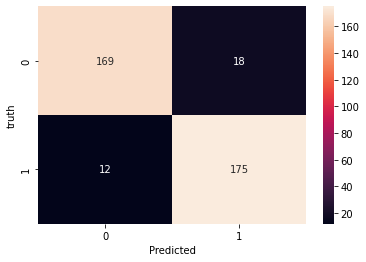

In [65]:

from matplotlib import pyplot as plt 
import seaborn as sn
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("truth")

In [66]:
print(classification_report(y_text, y_predicted))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       187
           1       0.91      0.94      0.92       187

    accuracy                           0.92       374
   macro avg       0.92      0.92      0.92       374
weighted avg       0.92      0.92      0.92       374

